### Download the Prism DEM dataset with Zampy
Demo notebook for developers.


Note:
```
    two versions of this dataset are available, a 30 m and a 90 m resolution one.
    These are considered to be different datasets, and can be downloaded by using
    either the PrismDEM30 or the PrismDEM90 class.
```

Import packages and configure paths.

In [8]:
import numpy as np
from zampy.datasets.catalog import PrismDEM30, PrismDEM90
from zampy.datasets.dataset_protocol import TimeBounds, SpatialBounds
from pathlib import Path

work_dir = Path("/home/bart/Zampy")
download_dir = work_dir / "download"
ingest_dir = work_dir / "ingest"
times = TimeBounds(np.datetime64("2020-01-01"), np.datetime64("2020-12-31"))
bbox_demo = SpatialBounds(54, 6, 51, 3)

Download dataset.

In [9]:
canopy_height_dataset = PrismDEM30()
canopy_height_dataset.download(
    download_dir=download_dir,
    time_bounds=times,
    spatial_bounds=bbox_demo,
    variable_names=["elevation"],
)

File 'Copernicus_DSM_10_N51_00_E003_00.tar' already exists, skipping...
File 'Copernicus_DSM_10_N51_00_E004_00.tar' already exists, skipping...
File 'Copernicus_DSM_10_N52_00_E004_00.tar' already exists, skipping...
File 'Copernicus_DSM_10_N53_00_E004_00.tar' already exists, skipping...
File 'Copernicus_DSM_10_N51_00_E005_00.tar' already exists, skipping...
File 'Copernicus_DSM_10_N52_00_E005_00.tar' already exists, skipping...
File 'Copernicus_DSM_10_N53_00_E005_00.tar' already exists, skipping...


True

Data ingestion to the unified format in `zampy`.

In [10]:
canopy_height_dataset.ingest(download_dir, ingest_dir)

File 'Copernicus_DSM_10_N52_00_E005_00.nc' already exists, skipping...
File 'Copernicus_DSM_10_N52_00_E004_00.nc' already exists, skipping...
File 'Copernicus_DSM_10_N53_00_E004_00.nc' already exists, skipping...
File 'Copernicus_DSM_10_N51_00_E005_00.nc' already exists, skipping...
File 'Copernicus_DSM_10_N51_00_E003_00.nc' already exists, skipping...
File 'Copernicus_DSM_10_N53_00_E005_00.nc' already exists, skipping...
File 'Copernicus_DSM_10_N51_00_E004_00.nc' already exists, skipping...


True

In [11]:
ds = canopy_height_dataset.load(
    ingest_dir=ingest_dir,
    time_bounds=times,
    spatial_bounds=bbox_demo,
    variable_names=["elevation"],
    resolution=0.01,
    regrid_method="flox",
)

In [12]:
from zampy.datasets import converter

ds_convert = converter.convert(ds, canopy_height_dataset, "ALMA")

elevation renamed to elevation.
Conversion of dataset 'prism-dem-30' following ALMA convention is complete!


In [13]:
ds_convert.compute()

<xarray.Dataset>
Dimensions:    (latitude: 301, longitude: 301)
Coordinates:
  * latitude   (latitude) float64 51.0 51.01 51.02 51.03 ... 53.98 53.99 54.0
  * longitude  (longitude) float64 3.0 3.01 3.02 3.03 ... 5.97 5.98 5.99 6.0
Data variables:
    elevation  (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  ALMA

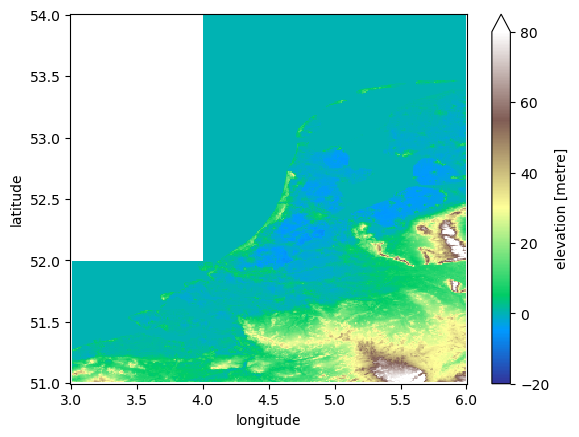

In [14]:
ds["elevation"].plot(cmap="terrain", vmin=-20, vmax=80)